In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#add company choice here
#add date choice here
url = "https://www.quandl.com/api/v3/datasets/WIKI/AMZN.json?start_date=2012-01-01&end_date=2018-03-01&collapse=monthly&api_key=e_WTsnJKsmnSoxEyY19D"
api_key = "e_WTsnJKsmnSoxEyY19D"

In [3]:
response = requests.get(url )
data = response.json()
print(json.dumps(data, indent=4, sort_keys=True))
#pprint(data)

{
    "dataset": {
        "collapse": "monthly",
        "column_index": null,
        "column_names": [
            "Date",
            "Open",
            "High",
            "Low",
            "Close",
            "Volume",
            "Ex-Dividend",
            "Split Ratio",
            "Adj. Open",
            "Adj. High",
            "Adj. Low",
            "Adj. Close",
            "Adj. Volume"
        ],
        "data": [
            [
                "2018-03-31",
                1513.6,
                1518.49,
                1465.0,
                1493.45,
                6835230.0,
                0.0,
                1.0,
                1513.6,
                1518.49,
                1465.0,
                1493.45,
                6835230.0
            ],
            [
                "2018-02-28",
                1519.51,
                1528.7,
                1512.0,
                1512.45,
                4426580.0,
                0.0,
                1.0,
  

In [4]:
date = []
open_ = []
high = []
low = []
close = []
volume = []

daily_difference = []
weekly_difference = []
monthly_difference = []
yearly_difference = []


for pr in data["dataset"]["data"]:
    date.append(pr[0])
    open_.append(pr[1])
    high.append(pr[2])
    low.append(pr[3])
    close.append(pr[4])
    volume.append(pr[5])

#reverse the lists so they are in ascending order
date = list(reversed(date))
open_= list(reversed(open_))
high = list(reversed(high))
low = list(reversed(low))
close = list(reversed(close))
volume = list(reversed(volume))
    
stk_file = {"date": date, "open": open_, "high": high, "low": low, "close": close, "volume": volume}

stk_file = pd.DataFrame(stk_file)

In [5]:
monthly_difference.append(0)

for i in range(1, len(date), 1):
    monthdiff=close[i]-open_[i-1]
    monthly_difference.append(monthdiff)

#make a new dataframe for the analysis by month; add column for monthly difference
stk_file_month = stk_file




In [6]:
#make monthly difference column
stk_file_month['monthly_difference'] = monthly_difference


stk_file_month

,date,open,high,low,close,volume,monthly_difference
0,2012-01-31,194.0000,195.6300,189.7000,194.4400,12772200.0,0.0000
1,2012-02-29,183.8900,184.0000,179.0100,179.6900,5300300.0,-14.3100
2,2012-03-31,205.0200,206.8500,201.8700,202.5100,4438100.0,18.6200
3,2012-04-30,223.9500,233.8400,223.0500,231.9000,9756900.0,26.8800
4,2012-05-31,209.4800,213.7878,207.1100,212.9100,4944000.0,-11.0400
5,2012-06-30,224.7000,228.3500,223.7100,228.3500,3614400.0,18.8700
6,2012-07-31,235.1000,236.3000,231.6100,233.3000,3453600.0,8.6000
7,2012-08-31,248.0700,249.4500,245.5001,248.2700,3347500.0,13.1700
8,2012-09-30,256.1400,257.0000,253.2000,254.3200,2456600.0,6.2500
9,2012-10-31,236.3200,238.7000,230.5000,232.8931,4797600.0,-23.2469


In [7]:
#make monthly difference column
stk_file_month['monthly_difference'] = monthly_difference


stk_file_month

,date,open,high,low,close,volume,monthly_difference
0,2012-01-31,194.0000,195.6300,189.7000,194.4400,12772200.0,0.0000
1,2012-02-29,183.8900,184.0000,179.0100,179.6900,5300300.0,-14.3100
2,2012-03-31,205.0200,206.8500,201.8700,202.5100,4438100.0,18.6200
3,2012-04-30,223.9500,233.8400,223.0500,231.9000,9756900.0,26.8800
4,2012-05-31,209.4800,213.7878,207.1100,212.9100,4944000.0,-11.0400
5,2012-06-30,224.7000,228.3500,223.7100,228.3500,3614400.0,18.8700
6,2012-07-31,235.1000,236.3000,231.6100,233.3000,3453600.0,8.6000
7,2012-08-31,248.0700,249.4500,245.5001,248.2700,3347500.0,13.1700
8,2012-09-30,256.1400,257.0000,253.2000,254.3200,2456600.0,6.2500
9,2012-10-31,236.3200,238.7000,230.5000,232.8931,4797600.0,-23.2469


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


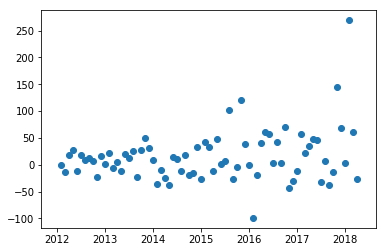

In [8]:
#add formatted date column for use in regression model
stk_file_month['formatted_date'] = pd.to_datetime(stk_file_month.date,format='%Y-%m-%d')

#Regression Model

# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this
X = stk_file_month.formatted_date.values.reshape(-1, 1)
y = stk_file_month.monthly_difference.values.reshape(-1, 1)
plt.scatter(X, y)
# Create the model and fit the model to the data

### BEGIN SOLUTION
model = LinearRegression()
### END SOLUTION

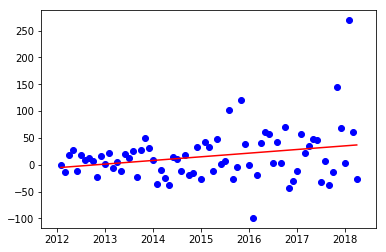

In [9]:
#MODEL 1 - PREDICT NEXT SINGLE VALUE CHANGE (UP OR DOWN? THIS IS NOT GOING TO BE VERY GOOD)

#fit the data and use the model to predict future values

model.fit(X, y)

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

#convert dates for modeling
x_min=x_min.astype(float)
x_max=x_max.astype(float)

#more modeling
y_min = model.predict(x_min)
y_max = model.predict(x_max)

#convert back to format for visualizing
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

Mean Squared Error (MSE): 1709.595519399584
R-squared (R2 ): 0.05108013639683118


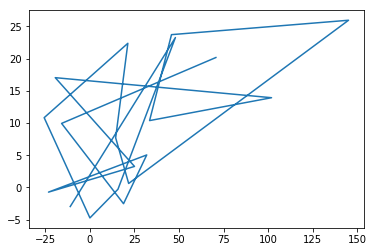

In [10]:
##convert dates for modeling

#y_test=

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

### BEGIN SOLUTION
X_test=X_test.astype(float)
# # Use our model to make predictions
predicted = model.predict(X_test)

# # Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# # Call the `score` method on the model to show the r2 score

# ### BEGIN SOLUTION
model.score(X_test, y_test)

plt.plot(y_test, predicted)

In [ ]:
#Findings: monthly data is not useful.